### Imports
Importazioni dei pacchetti e inizializzazioni varie

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from repository import load_csv_to_dict

import os
import traceback

from heuristic import *
from problem import ProblemFactory
from visualize import Animation
from input_handler import InputHandler
import repository
import pandas as pd

C:\Users\nikbe\AppData\Local\Temp\ipykernel_23244\722038826.py:13: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Confronto sulle diverse euristiche

Distanza diagonale

In [9]:
for i in range(0,50):
    os.system("python pf4ea gen -f exp_0_h1.csv --heuristic h1 --csv_output")

Distanza di Chebyshev

In [10]:
for i in range(0,50):
    os.system("python pf4ea gen -f exp_0_h2.csv --heuristic h2 --csv_output")

Distanza di Manhattan

In [11]:
for i in range(0,50):
    os.system("python pf4ea gen -f exp_0_h3.csv --heuristic h3 --csv_output")

Carico e pulisco i risultati

In [4]:
# Distanza diagonale
df_h1 = pd.read_csv("benchmarks\output_csv\output_exp_0_h1.csv")
df_h1 = df_h1.dropna()
df_h1 = df_h1.groupby(['rows']).mean()

# Distanza di Chebyshev
df_h2 = pd.read_csv("benchmarks\output_csv\output_exp_0_h2.csv")
df_h2 = df_h2.dropna()
df_h2 = df_h2.groupby(['rows']).mean()

# Distanza di Manhattan
df_h3 = pd.read_csv("benchmarks\output_csv\output_exp_0_h3.csv")
df_h3 = df_h3.dropna()
df_h3 = df_h3.groupby(['rows']).mean()



#### Confronto i tempi

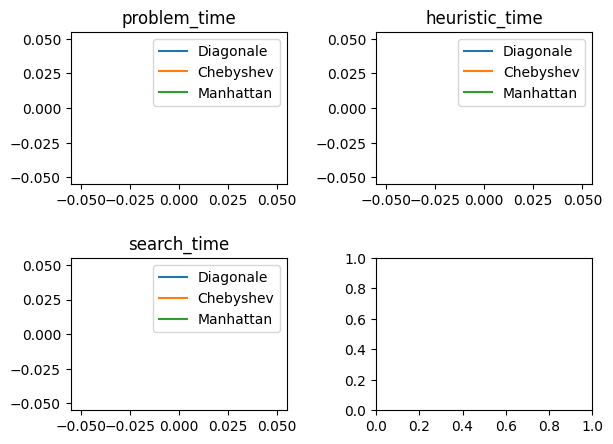

In [5]:
fig, axs = plt.subplots(2,2)

# problem_time
axs[0,0].plot(df_h1["problem_time"])
axs[0,0].plot(df_h2["problem_time"])
axs[0,0].plot(df_h3["problem_time"])
axs[0,0].set_title("problem_time")
axs[0,0].legend(["Diagonale","Chebyshev","Manhattan",])

# heuristic_time
axs[0,1].plot(df_h1["heuristic_time"])
axs[0,1].plot(df_h2["heuristic_time"])
axs[0,1].plot(df_h3["heuristic_time"])
axs[0,1].set_title("heuristic_time")
axs[0,1].legend(["Diagonale","Chebyshev","Manhattan",])

# search_time
axs[1,0].plot(df_h1["search_time"])
axs[1,0].plot(df_h2["search_time"])
axs[1,0].plot(df_h3["search_time"])
axs[1,0].set_title("search_time")
axs[1,0].legend(["Diagonale","Chebyshev","Manhattan",])

fig.tight_layout(pad=2)

#### Percentuale nodi visitati

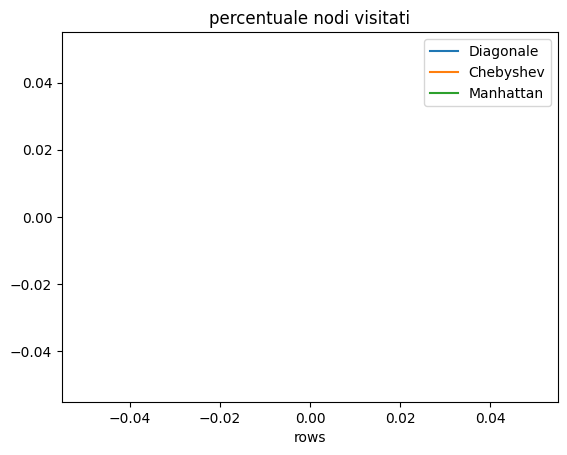

In [17]:
df_h1["percentage_visited_nodes"].plot()
df_h2["percentage_visited_nodes"].plot()
df_h3["percentage_visited_nodes"].plot()

plt.title("percentuale nodi visitati")
plt.legend(["Diagonale","Chebyshev","Manhattan",])
plt.show()

## Test sulla grandezza della griglia


Eseguo la versione normale

In [6]:
for i in range(0,25):
    os.system("python pf4ea gen -f exp_0_n.csv --csv_output")

KeyboardInterrupt: 

Eseguo la versione variante

In [ ]:
for i in range(0,25):
    os.system("python pf4ea gen -f exp_0_v.csv -v --heuristic h5 --csv_output")

Carico i risultati e li pulisco

In [ ]:
import matplotlib.pyplot as plt

# versione normale
df_normale = pd.read_csv("benchmarks\output_csv\output_exp_0_n.csv")
df_normale = df_normale.dropna()
df_normale = df_normale.groupby(['rows']).mean()

# versione variante
df_variante = pd.read_csv("benchmarks\output_csv\output_exp_0_v.csv")
df_variante = df_variante.dropna()
df_variante = df_variante.groupby(['rows']).mean()

C:\Users\nikbe\AppData\Local\Temp\ipykernel_24120\4027860574.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_normale = df_normale.groupby(['rows']).mean()
C:\Users\nikbe\AppData\Local\Temp\ipykernel_24120\4027860574.py:11: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_variante = df_variante.groupby(['rows']).mean()


#### Confronto i tempi delle due versioni

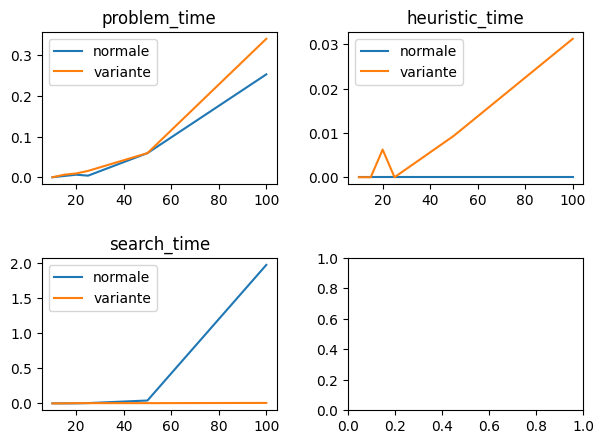

In [ ]:
fig, axs = plt.subplots(2,2)

# problem_time
axs[0,0].plot(df_normale["problem_time"])
axs[0,0].plot(df_variante["problem_time"])
axs[0,0].set_title("problem_time")
axs[0,0].legend(["normale","variante"])

# heuristic_time
axs[0,1].plot(df_normale["heuristic_time"])
axs[0,1].plot(df_variante["heuristic_time"])
axs[0,1].set_title("heuristic_time")
axs[0,1].legend(["normale","variante"])

# search_time
axs[1,0].plot(df_normale["search_time"])
axs[1,0].plot(df_variante["search_time"])
axs[1,0].set_title("search_time")
axs[1,0].legend(["normale","variante"])

fig.tight_layout(pad=2)

#### Controllo sulla memoria occupata

Text(0.5, 1.0, 'memoria occupata dalla griglia')

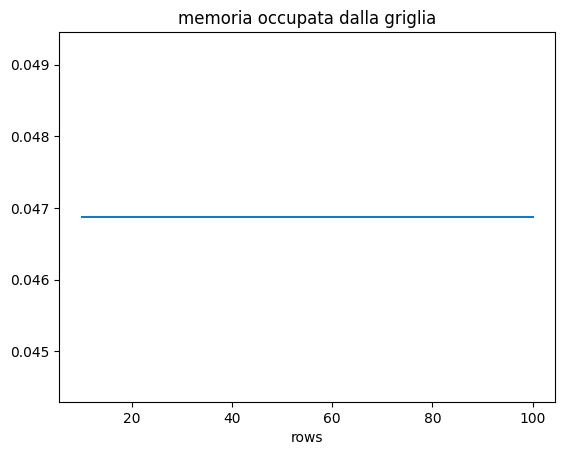

In [ ]:
df_normale["mem_grid"].plot()

plt.title("memoria occupata dalla griglia")

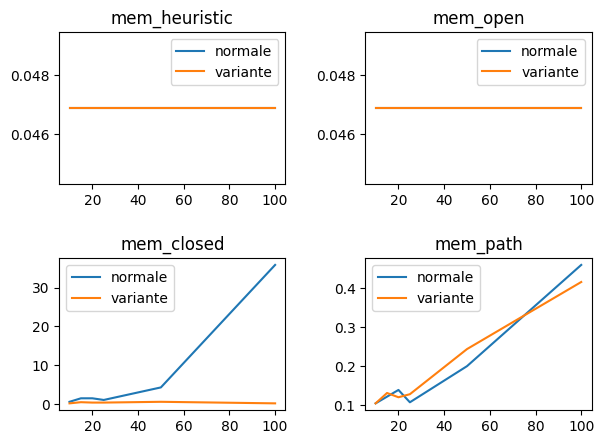

In [ ]:

fig, axs = plt.subplots(2,2)

# mem_heuristic
axs[0,0].plot(df_normale["mem_heuristic"])
axs[0,0].plot(df_variante["mem_heuristic"])
axs[0,0].set_title("mem_heuristic")
axs[0,0].legend(["normale","variante"])

# mem_open
axs[0,1].plot(df_normale["mem_open"])
axs[0,1].plot(df_variante["mem_open"])
axs[0,1].set_title("mem_open")
axs[0,1].legend(["normale","variante"])

# mem_closed
axs[1,0].plot(df_normale["mem_closed"])
axs[1,0].plot(df_variante["mem_closed"])
axs[1,0].set_title("mem_closed")
axs[1,0].legend(["normale","variante"])

# mem_path
axs[1,1].plot(df_normale["mem_path"])
axs[1,1].plot(df_variante["mem_path"])
axs[1,1].set_title("mem_path")
axs[1,1].legend(["normale","variante"])

fig.tight_layout(pad=2)

#### Percentuale di nodi visitati

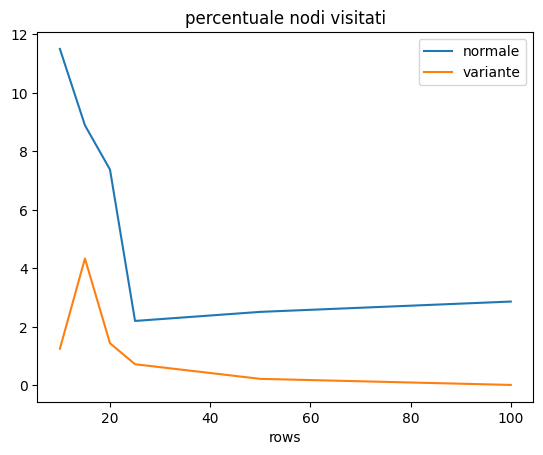

In [ ]:
df_normale["percentage_visited_nodes"].plot()
df_variante["percentage_visited_nodes"].plot()

plt.title("percentuale nodi visitati")
plt.legend(["normale","variante"])
plt.show()

## Test sul numero di agenti


Eseguo i due algoritmi

In [ ]:
for i in range(0,50):
    os.system("python pf4ea gen -f exp_1_n.csv  --csv_output")


In [ ]:
for i in range(0,50):
    os.system("python pf4ea gen -f exp_1_v.csv -v --heuristic h5 --csv_output")

Carico e pulisco i risultati

In [ ]:
import matplotlib.pyplot as plt

# versione normale
df_normale = pd.read_csv("benchmarks\output_csv\output_exp_1_n.csv")
df_normale = df_normale.dropna()
df_normale = df_normale.groupby(['num_agents']).mean()

# versione variante
df_variante = pd.read_csv("benchmarks\output_csv\output_exp_1_v.csv")
df_variante = df_variante.dropna()
df_variante = df_variante.groupby(['num_agents']).mean()

C:\Users\nikbe\AppData\Local\Temp\ipykernel_24672\2375926315.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_normale = df_normale.groupby(['num_agents']).mean()
C:\Users\nikbe\AppData\Local\Temp\ipykernel_24672\2375926315.py:11: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_variante = df_variante.groupby(['num_agents']).mean()


#### Confronto i tempi delle due versioni

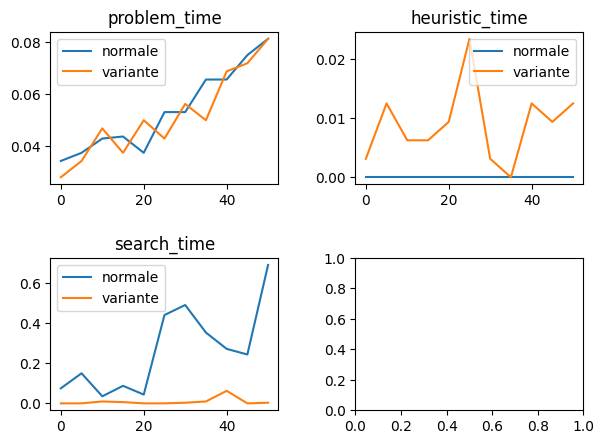

In [ ]:
fig, axs = plt.subplots(2,2)

# problem_time
axs[0,0].plot(df_normale["problem_time"])
axs[0,0].plot(df_variante["problem_time"])
axs[0,0].set_title("problem_time")
axs[0,0].legend(["normale","variante"])

# heuristic_time
axs[0,1].plot(df_normale["heuristic_time"])
axs[0,1].plot(df_variante["heuristic_time"])
axs[0,1].set_title("heuristic_time")
axs[0,1].legend(["normale","variante"])

# search_time
axs[1,0].plot(df_normale["search_time"])
axs[1,0].plot(df_variante["search_time"])
axs[1,0].set_title("search_time")
axs[1,0].legend(["normale","variante"])

fig.tight_layout(pad=2)

#### Controllo la memoria occupata dalla griglia

Text(0.5, 1.0, 'memoria occupata dalla griglia')

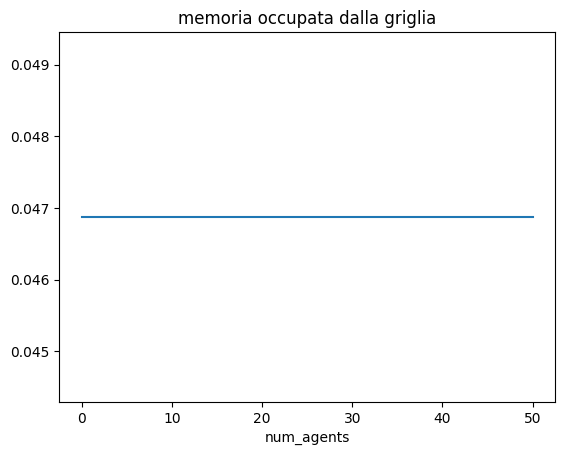

In [ ]:
df_normale["mem_grid"].plot()

plt.title("memoria occupata dalla griglia")

#### Confronto le percentuali di nodi visitati

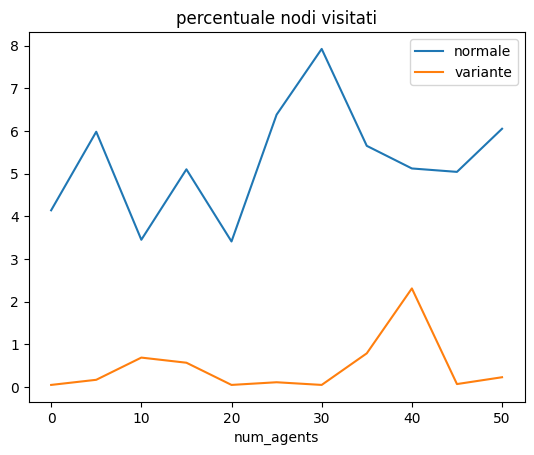

In [ ]:
df_normale["percentage_visited_nodes"].plot()
df_variante["percentage_visited_nodes"].plot()

plt.title("percentuale nodi visitati")
plt.legend(["normale","variante"])
plt.show()

#### Confronto i costi e le lunghezze dei percorsi trovati

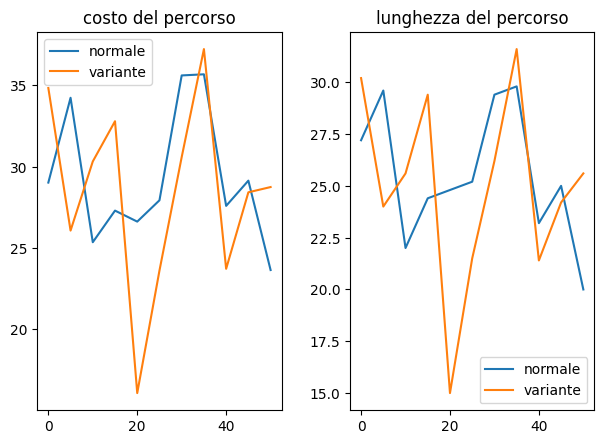

In [ ]:
fig, axs = plt.subplots(1,2)

# path_cost
axs[0].plot(df_normale["path_cost"])
axs[0].plot(df_variante["path_cost"])
axs[0].set_title("costo del percorso")
axs[0].legend(["normale","variante"])

# path_length
axs[1].plot(df_normale["path_length"])
axs[1].plot(df_variante["path_length"])
axs[1].set_title("lunghezza del percorso")
axs[1].legend(["normale","variante"])

fig.tight_layout(pad=2)

## Test sull'attraversabilità della griglia

Eseguo la versione normale

In [ ]:
for i in range(0,50):
    os.system("python pf4ea gen -f exp_2_n.csv --csv_output")

Eseguo la variante

In [ ]:
for i in range(0,50):
    os.system("python pf4ea gen -f exp_2_v.csv -v --heuristic h5 --csv_output")

Leggo e pulisco i risultati

In [ ]:
import matplotlib.pyplot as plt

# versione normale
df_normale = pd.read_csv("benchmarks\output_csv\output_exp_2_n.csv")
df_normale = df_normale.dropna()
df_normale = df_normale.groupby(['rows']).mean()

# versione variante
df_variante = pd.read_csv("benchmarks\output_csv\output_exp_2_v.csv")
df_variante = df_variante.dropna()
df_variante = df_variante.groupby(['rows']).mean()

#### Confronto i tempi impiegati

In [ ]:
fig, axs = plt.subplots(2,2)

# problem_time
axs[0,0].plot(df_normale["problem_time"])
axs[0,0].plot(df_variante["problem_time"])
axs[0,0].set_title("problem_time")
axs[0,0].legend(["normale","variante"])

# heuristic_time
axs[0,1].plot(df_normale["heuristic_time"])
axs[0,1].plot(df_variante["heuristic_time"])
axs[0,1].set_title("heuristic_time")
axs[0,1].legend(["normale","variante"])

# search_time
axs[1,0].plot(df_normale["search_time"])
axs[1,0].plot(df_variante["search_time"])
axs[1,0].set_title("search_time")
axs[1,0].legend(["normale","variante"])

fig.tight_layout(pad=2)

#### Confronto la memoria utilizzata

In [ ]:

fig, axs = plt.subplots(2,2)

# mem_heuristic
axs[0,0].plot(df_normale["mem_heuristic"])
axs[0,0].plot(df_variante["mem_heuristic"])
axs[0,0].set_title("mem_heuristic")
axs[0,0].legend(["normale","variante"])

# mem_open
axs[0,1].plot(df_normale["mem_open"])
axs[0,1].plot(df_variante["mem_open"])
axs[0,1].set_title("mem_open")
axs[0,1].legend(["normale","variante"])

# mem_closed
axs[1,0].plot(df_normale["mem_closed"])
axs[1,0].plot(df_variante["mem_closed"])
axs[1,0].set_title("mem_closed")
axs[1,0].legend(["normale","variante"])

# mem_path
axs[1,1].plot(df_normale["mem_path"])
axs[1,1].plot(df_variante["mem_path"])
axs[1,1].set_title("mem_path")
axs[1,1].legend(["normale","variante"])

fig.tight_layout(pad=2)

#### Confronto la percentuale di nodi visitati

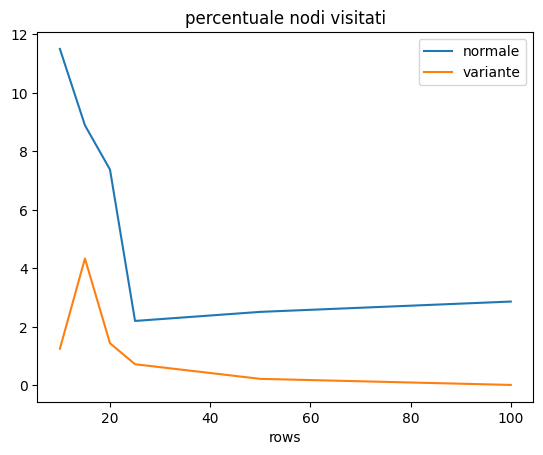

In [ ]:
df_normale["percentage_visited_nodes"].plot()
df_variante["percentage_visited_nodes"].plot()

plt.title("percentuale nodi visitati")
plt.legend(["normale","variante"])
plt.show()

#### Confronto il costo e la lunghezza delle solulioni trovate

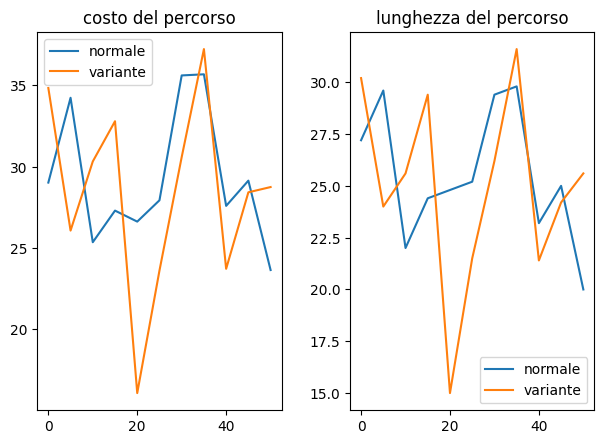

In [ ]:
fig, axs = plt.subplots(1,2)

# path_cost
axs[0].plot(df_normale["path_cost"])
axs[0].plot(df_variante["path_cost"])
axs[0].set_title("costo del percorso")
axs[0].legend(["normale","variante"])

# path_length
axs[1].plot(df_normale["path_length"])
axs[1].plot(df_variante["path_length"])
axs[1].set_title("lunghezza del percorso")
axs[1].legend(["normale","variante"])

fig.tight_layout(pad=2)

## Test sull'agglomerazione degli ostacoli

Eseguo la versione normale

In [ ]:
for i in range(0,50):
    os.system("python pf4ea gen -f exp_3_n.csv --csv_output")

Eseguo la variante

In [ ]:
for i in range(0,50):
    os.system("python pf4ea gen -f exp_3_v.csv -v --heuristic h5 --csv_output")

Leggo e pulisco i risultati

In [ ]:
import matplotlib.pyplot as plt

# versione normale
df_normale = pd.read_csv("benchmarks\output_csv\output_exp_3_n.csv")
df_normale = df_normale.dropna()
df_normale = df_normale.groupby(['rows']).mean()

# versione variante
df_variante = pd.read_csv("benchmarks\output_csv\output_exp_3_v.csv")
df_variante = df_variante.dropna()
df_variante = df_variante.groupby(['rows']).mean()

#### Confronto i tempi impiegati

In [ ]:
fig, axs = plt.subplots(2,2)

# problem_time
axs[0,0].plot(df_normale["problem_time"])
axs[0,0].plot(df_variante["problem_time"])
axs[0,0].set_title("problem_time")
axs[0,0].legend(["normale","variante"])

# heuristic_time
axs[0,1].plot(df_normale["heuristic_time"])
axs[0,1].plot(df_variante["heuristic_time"])
axs[0,1].set_title("heuristic_time")
axs[0,1].legend(["normale","variante"])

# search_time
axs[1,0].plot(df_normale["search_time"])
axs[1,0].plot(df_variante["search_time"])
axs[1,0].set_title("search_time")
axs[1,0].legend(["normale","variante"])

fig.tight_layout(pad=2)

#### Confronto la memoria utilizzata

In [ ]:

fig, axs = plt.subplots(2,2)

# mem_heuristic
axs[0,0].plot(df_normale["mem_heuristic"])
axs[0,0].plot(df_variante["mem_heuristic"])
axs[0,0].set_title("mem_heuristic")
axs[0,0].legend(["normale","variante"])

# mem_open
axs[0,1].plot(df_normale["mem_open"])
axs[0,1].plot(df_variante["mem_open"])
axs[0,1].set_title("mem_open")
axs[0,1].legend(["normale","variante"])

# mem_closed
axs[1,0].plot(df_normale["mem_closed"])
axs[1,0].plot(df_variante["mem_closed"])
axs[1,0].set_title("mem_closed")
axs[1,0].legend(["normale","variante"])

# mem_path
axs[1,1].plot(df_normale["mem_path"])
axs[1,1].plot(df_variante["mem_path"])
axs[1,1].set_title("mem_path")
axs[1,1].legend(["normale","variante"])

fig.tight_layout(pad=2)

#### Confronto la percentuale di nodi visitati

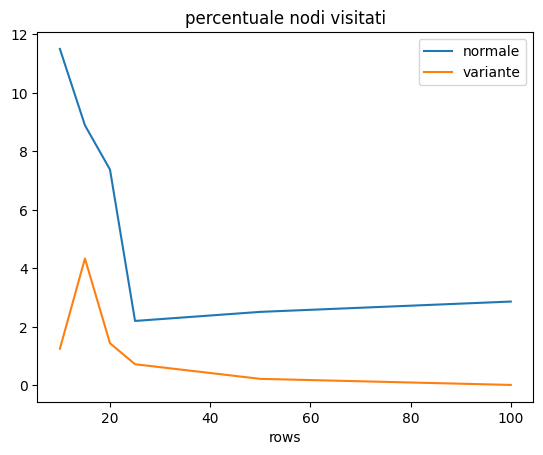

In [ ]:
df_normale["percentage_visited_nodes"].plot()
df_variante["percentage_visited_nodes"].plot()

plt.title("percentuale nodi visitati")
plt.legend(["normale","variante"])
plt.show()

#### Confronto il costo e la lunghezza delle soluzioni trovate

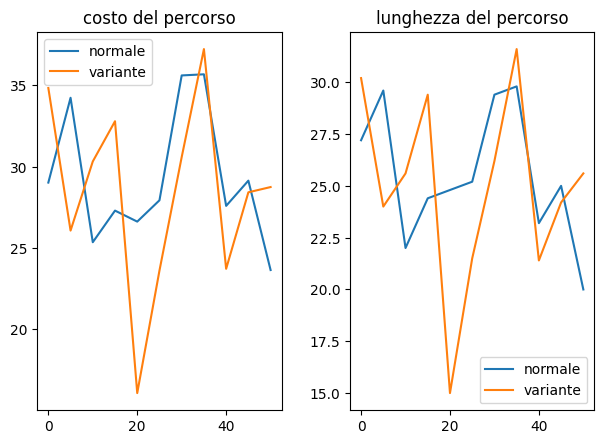

In [ ]:
fig, axs = plt.subplots(1,2)

# path_cost
axs[0].plot(df_normale["path_cost"])
axs[0].plot(df_variante["path_cost"])
axs[0].set_title("costo del percorso")
axs[0].legend(["normale","variante"])

# path_length
axs[1].plot(df_normale["path_length"])
axs[1].plot(df_variante["path_length"])
axs[1].set_title("lunghezza del percorso")
axs[1].legend(["normale","variante"])

fig.tight_layout(pad=2)